<h1 style='color: orange' align="center">Лабораторная работа №2</h1>

<p> <b>Студент:</b> Ивенкова Л.В.<br> 
    <b>Группа:</b> М8О-208Б-19<br> 
    <b>Преподаватель:</b> Гавриш О.Н.</p>

<h2 align="center">Часть 1 - Дихотомия и метод Ньютона</h2>

<b>Задание: вариант А</b>
<ol>
    <li>Реализовать в виде функций метод дихотомии и метод Ньютона</li>
    <li>Сделать ползунок для перебора значений вх. параметров</li>
    <li>Сделать вывод 6 кадров нахождения решения и оформить через массив графиков.</li>
    <li>Сравнить ответ с тем, что даёт solve</li>
</ol>

Функция: $y = x^3 - 9*x^2 + 23*x - 15$

In [1]:
y(x) = x**3 - 9 * x**2 + 23 * x - 15
show(y(x))

x^3 - 9*x^2 + 23*x - 15

<h2 align="left">Метод дихотомии.</h2>

Существует довольно очевидная теорема: "Если непрерывная функция на концах некоторого интервала имеет значения разных знаков, то внутри этого интервала у нее есть корень (как минимум, один, но м.б. и несколько)". На базе этой теоремы построено численное нахождение приближенного значения корня функции. Обобщенно этот метод называется дихотомией, т.е. делением отрезка на две части.  

Перед применением метода для поиска корней функции необходимо отделить корни одним из известных способов, например, графическим методом. Отделение корней необходимо например в нашем случае, так как неизвестно на каком отрезке нужно искать корни.   
Но по графику мы можем с лёгкостью определить эти отрезки:

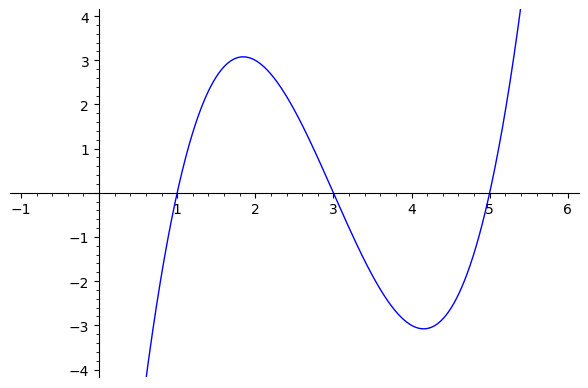

In [2]:
plot(y, xmin = -1, xmax = 6, ymin=-4, ymax=4)

Напишем программу для вычисления корней некоторой функции func методом дихотомии.  
Здесь left, right - границы интервала поиска корня.  
eps - точность, с которой находится корень. 

Функция или выдаст сообщение об ошибке, или вернёт найденный корень (если требуется с графиками поиска)

In [3]:
def diсhotomy(func, left, right, eps=1e-15, visualization=False):
    
    f_plot = plot(y, (x, left-0.1, right+0.1), ymin=-5, ymax=5) # график функции
    plots = [] # массив графиков поиска
    
    r = right; # для подписей на графиках
    l = left; 
    
    while abs(right - left) > eps: # пока корень ещё может уместиться в отрезке с заданной точностью
        mid = (left + right) / 2 # тыкаем в середину отрезка
        if func(x=left) * func(x=mid) > 0: # если совпадают знаки с левой гарницей
            left = mid # то смещаем левую границу в середину
        elif func(x=right) * func(x=right) > 0: # аналогично для правой границы
            right = mid
        else: 
            if visualization:
               return ('Error', None)
            else:
               return 'Error'
        
        # Сохраняем график текущей стадии поиска корня в общий массив
        if visualization:
            plots.append((point((mid,func(mid)), color="red", size=100 ) + f_plot) + text((r"$x={}$").format(mid), ((l+r) / 2, -5), fontsize=12, color="black"))
        
    if visualization:
        return (n(left), plots)
    else:
        return n(left)

Создадим позунки для параметров, визуализацию методов:

In [4]:
@interact
def diсhotomy_interactive(left=(0, 6, 0.1), right=(0, 6, 0.1)):
    print([left, right])
    if left >= right:
        print('Ошибка. Правая граница интервала должа быть больше левой.')
    else:
        result, plots = diсhotomy(y, left, right, eps=1e-15, visualization=True)
        if result == 'Error':
            print('Ошибка. На этом интервале не работает метод дихотомии (нет экстремума или их больше одного).')
        else:
            print('Ответ: ', result)
            graphics_array([[plots[-6 + i], plots[-6 + i + 1]] for i in range(0, 6, 2)]).show(figsize=10)

Interactive function <function diсhotomy_interactive at 0x6ffea94c6b90> with 2 widgets
  left: FloatSlider(val…

Сравненим результат, полученный методом дихотомии, и результат вычисления функции solve():

In [5]:
solve(y, x)

[x == 1, x == 5, x == 3]

In [6]:
show(diсhotomy(y, -1, 2))
show(diсhotomy(y, 2, 4))
show(diсhotomy(y, 4, 6))

1.00000000000000

3.00000000000000

5.00000000000000

Результаты совпали.

<h2 align="left">Метод Ньютона.</h2>

Основная идея метода заключается в следующем: задаётся начальное приближение вблизи предположительного корня, после чего строится касательная к графику исследуемой функции в точке приближения, для которой находится пересечение с осью абсцисс. Эта точка берётся в качестве следующего приближения. И так далее, пока не будет достигнута необходимая точность.

Каждое последующее приближение  корня  рассчитывается на основании предшествующих данных с помощью следующей рекуррентной формулы:

$\Large x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$

In [7]:
def newton(func, left, right, eps=1e-15, visualization=False): 
    func_plot = plot(y, (x, left-0.1, right+0.1), ymin=-4, ymax=5)
    plots = [] # массив графиков поиска
    
    iterations = 0 # количество итераций (и отрисованных графиков) - чтобы знать, что их не меньше 6
    if not visualization:
        iterations = 6 # если графики рисовать не нужно, то не будем отслеживать количество итераций
    
    df = func.derivative()
    cur = left
    next = (left + right) / 2
    
    while abs(next - cur) > eps or iterations < 6:
        if visualization:
            iterations += 1
            tangent = func(x=cur) + df(x=cur) * (x - cur) # уравнение касательной в точке
            plots.append(((plot(tangent, (x, left-0.1, right+0.1), ymin=-9, ymax=5, color="red")) + func_plot)
                + text((r"$x={}$").format(cur), ((left + right) / 2, -5), fontsize=14, color="black"))
        
        cur = next
        next = cur - func(x=cur) / df(x=cur)
    
    if visualization:
        return (cur, plots)
    else:
        return cur

In [8]:
@interact
def newton_interactive(left=(0, 6, 0.1), right=(0, 6, 0.1)):
    print([left, right])
    if left >= right:
        print('Ошибка. Правая граница интервала должа быть больше левой.')
    else:
        result, plots = newton(y, left, right, eps=1e-15, visualization=True)
        print('Ответ: ', result)
        graphics_array([[plots[-6 + i], plots[-6 + i + 1]] for i in range(0, 6, 2)]).show(figsize=15)

Interactive function <function newton_interactive at 0x6ffea939ba70> with 2 widgets
  left: FloatSlider(value=…

Так как метод Ньютона работает во много раз быстрее метода дихотомии, то здесь довольно часто корень может находиться всего за несколько итераций. И так как графиков тогда будет меньше 6 и потеряется наглядность, то я поставила условие, что если корень уже найден, а графиков мало, то вычисляния продолжатся и массив графиков поиска дополнится ещё несколькими графиками, в которых точка касания будет опять колебаться в границах корня.

Сравним с solve:

In [9]:
show(newton(y, 0.7, 2))
show(newton(y, 2.1, 4))
show(newton(y, 4, 5.9))

1.00000000000000

3.00000000000000

5.00000000000000

Совпадает.

<h2 align="center">Часть 2 - Расширенный алгоритм Евклида поиска НОД.</h2>

<b>Задание:</b>
<ol>
    <li>Реализовать расширенный алгоритм Евклида</li>
    <li>Получить НОД, сравнить его с результатом от функции gcd()</li>
    <li>получить представление НОД в виде: f*u + v*g (тождество Безу)</li>
</ol>

<b>Вариант: 1</b> 
  
$f = x^4 - 4*x^3 + 7*x^2 - 5*x + 1$  
$g = x^5 - x^4 - x^3 + x^2 + 5*x - 5$

In [10]:
R, (x) = PolynomialRing(Q,'x').objgens() # Будем работать в кольце рациональных чисел
f = x^4 - 4*x^3 + 7*x^2 - 5*x + 1
g = x^5 - x^4 - x^3 + x^2 + 5*x - 5

Поссчитаем НОД при помощи встроенной функции gcd().

In [11]:
res_gcd = gcd(f, g)
print("НОД =", str(res_gcd))

НОД = x - 1


Расширенный алгоритм Евклида:

In [12]:
def adv_gcd(a, b):
    if(a == 0):
        return b, 0, 1
    
    d, x1, y1 = adv_gcd(b%a, a)
    x = y1 - (b // a) * x1
    y = x1
    return (d, x, y)

Посчитаем НОД f и g:

In [13]:
res2_gcd, u, v = adv_gcd(f, g)
print('GCD =', res2_gcd)
print('u =', u)
print('v =', v)

GCD = 1936/441*x - 1936/441
u = -16/21*x^3 - 128/441*x^2 + 656/441*x + 1264/441
v = 16/21*x^2 - 880/441*x + 640/441


Нормируем:

In [14]:
C = 441/1936

res = res2_gcd * C
u2 = u * C
v2 = v * C

print('GCD =', res)
print('u =', u2)
print('v =', v2)

GCD = x - 1
u = -21/121*x^3 - 8/121*x^2 + 41/121*x + 79/121
v = 21/121*x^2 - 5/11*x + 40/121


Результат, полученный при помощи алгоритма Евклида, совпал с результатом, полученным с помощью функции gcd(). Следовательно, НОД полиномов $f$ и $g$ равен $x-1$.

Проверим корректность коэффициентов в разложении Безу: 

In [15]:
f*u + v*g == res2_gcd

True

Полученный результат совпал с НОД, значит найденные коэффициенты верны. Алгоритм работает корректно.

<h2 align="center">Часть 3 - Упростить уравнение поверхности второго порядка в простраснтве.</h2>

<b>Задание:</b>
<ol>
    <li>Для заданной уравнением фигуры: упростить, привести к каноническому виду.</li>
    <li>Построить исходную фигуру и упрощенную.</li>
    <li>Собственные вектора и числа получать вручную,  сравнить с результатом встроенных функций.</li>
</ol>

<b>Вариант:</b> 1  
<b>Функция:</b>  $7x^2 + 8xy + 3y^2 + 8xz + 6yz + 3z^2 + 6x + y + 7$

In [16]:
var("x, y, z")
f(x, y, z) = 7*x**2 + 8*x*y + 3*y**2 + 8*x*z + 6*y*z + 3*z**2 + 6*x + y + 7
show(f(x, y, z))

7*x^2 + 8*x*y + 3*y^2 + 8*x*z + 6*y*z + 3*z^2 + 6*x + y + 7

Постороим исходную фигуру:

In [17]:
implicit_plot3d(f(x=x, y=y, z=z), (x, -30, 10), (y, -30, 10), (z, -10, 30))

Graphics3d Object

Для приведения поверхности к каноническому виду надо сначала вычислить ортогональные инварианты.

Пусть общее уравнение поверхности второго порядка будет выгялдеть так:

$a_{11}*x^2 + a_{22}*y^2 + a_{33}*z^2 + 2*a_{12}*xy  + 2*a_{13}*xz + 2*a{23}*yz  + 2*a_{1}*x + 2*a_{2}*y + 2*a_{3}*z + a_{0}$

Тогда:

$\tau_{1} = a_{11} + a_{22} + a_{33}$

$\tau_{2} = \begin{vmatrix}
    a_{11} & a_{12} \\
    a_{12} & a_{22} \\
\end{vmatrix} + 
\begin{vmatrix}
    a_{11} & a_{13}\\
    a_{13} & a_{33}\\
\end{vmatrix} + 
\begin{vmatrix}
    a_{22} & a_{23}\\
    a_{23} & a_{33}\\
\end{vmatrix}$

A = $\begin{pmatrix}
    a_{11} & a_{12} & a_{13}\\
    a_{12} & a_{22} & a_{23}\\
    a_{13} & a_{23} & a_{33}\\
\end{pmatrix}$ 
$\qquad$
delta = $det(A)$ = $\begin{vmatrix}
    a_{11} & a_{12} & a_{13}\\
    a_{12} & a_{22} & a_{23}\\
    a_{13} & a_{23} & a_{33}\\
\end{vmatrix}$ 
$\qquad$
Delta = $det(B)$ = $\begin{vmatrix}
    a_{11} & a_{12} & a_{13} & a_{1}\\
    a_{12} & a_{22} & a_{23} & a_{2}\\
    a_{13} & a_{23} & a_{33} & a_{3}\\
    a_{1} & a_{2}  & a_{3} &  a_{0}
\end{vmatrix}$

Подставляем наши значения:

In [18]:
A = matrix([             # матрица квадратичной формы
    [7, 4, 4],
    [4, 3, 3],
    [4, 3, 3],
])

B = matrix([
    [7, 4, 4, 3],
    [4, 3, 3, 0.5],
    [4, 3, 3, 0],
    [3, 0.5, 0, 7]
])

In [19]:
# Вычисляем ортогональные инварианты:

tau1 = A.trace()
tau2 = A[0:2, 0:2].det() + A[[0, 2], [0, 2]].det() + A[1:3, 1:3].det()
delta = A.det()
Delta = B.det()

show(LatexExpr("\\tau_{1} = "), tau1)
show(LatexExpr("\\tau_{2} = "), tau2)
show("delta =  ", delta)
show("Delta = ", Delta)

\tau_{1} =  13

\tau_{2} =  10

'delta =  ' 0

'Delta = ' -1.25000000000000

По вычисленным ортогональным инвариантам определяем <b>тип поверхности - эллиптический параболоид</b>.

У элептического параболоида каноническое уравнение выглядит следующим образом:

$\Large \frac{x^2}{a^2} + \frac{y^2}{b^2} = 2*z$

Далее надо найти собственные значения матрицы A.
Составляем характеристическое уравнение и решаем его:

In [20]:
var('l')
lam(l) = A.charpoly(var='l')
roots  = solve(lam(l)==0, l)
for i in roots:
    print(i.simplify(), '=', n(i.rhs()))

l == -1/2*sqrt(129) + 13/2 = 0.821091654199726
l == 1/2*sqrt(129) + 13/2 = 12.1789083458003
l == 0 = 0.000000000000000


Теперь найдем собственные значения через встроенную функцию.

In [21]:
for i in A.eigenvalues():
    show(i)

0

0.821091654199727?

12.17890834580028?

Собственные значения совпали.

Теперь вычисляем коэффициенты канонического уравнения: 

In [22]:
var("x1, y1, z1")
a = n(sqrt(-Delta/(roots[0].rhs()**2*tau2)))
b = n(sqrt(-Delta/(roots[1].rhs()**2*tau2)))
canonical(x1, y1, z1) = x1**2/a + y1**2/b - 2*z1
show(canonical(x1, y1, z1))

2.32239790664123*x1^2 + 34.4471547150592*y1^2 - 2*z1

Построим полученную упрощённую поверхность:

In [23]:
implicit_plot3d(canonical(x1=x1, y1=y1, z1=z1), (x1, -30, 10), (y1, -30, 10), (z1, -10, 30))

Graphics3d Object